In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline


data = pd.read_csv (r'C:\Users\daria\OneDrive\Desktop\Final Project\winemag-data_first150k.csv')
df = pd.DataFrame(data)
df = df.drop(df.columns[0], axis=1) 
df.describe()
df.head(10)


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [3]:

df_no_missing = df.loc[pd.isna(df['price'])==False]
df_no_missing['price'] = df_no_missing['price'].astype(int)
df_no_missing['price'].unique()


<ipython-input-3-bf7a16dd97cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_missing['price'] = df_no_missing['price'].astype(int)


array([ 235,  110,   90,   65,   66,   73,   60,   80,   48,  185,  325,
        290,   75,   24,   79,  220,   45,   57,   62,  105,   15,   37,
         22,   42,  135,   29,   23,   17,   26,   55,   39,   69,   30,
         50,   40,  100,   68,   28,   18,   25,   36,   38,   85,   19,
         54,   59,   10,   12,   13,   14,   20,  125,    7,   49,   93,
         32,   16,   21,   44,   35,   61,   34,   11,   58,  120,   41,
        200,   43,    9,   56,   46,   92,   94,   27,   95,   33,   70,
        155,   63,  130,  115,   31,   98,   52,   64,   91,  111,   88,
         74,   77,   87,  113,  140,  500,   51,  150,  240,   72,  103,
          8,  136,  141,  102,   47,   53,   96,   78,  149,  138,  117,
          4,   99,  848,  450,  330,  175,   89,   82,   71,  137,  145,
        698,  160,  770,  118,  238,  202,  250,  165,   83,  107,   76,
         67,  128,  119,  129,  180,    6,  225,    5,  152,   84,   86,
        124,   97,  365,  179,  350,  195,  300,  1

In [6]:
df_no_missing['points'].unique()


array([ 96,  95,  94,  90,  91,  86,  89,  88,  87,  93,  92,  85,  84,
        83,  82,  81, 100,  99,  98,  97,  80], dtype=int64)

In [7]:
df_no_missing.isnull().values.any()


True

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000274D87C8D00>,
      dtype=object)

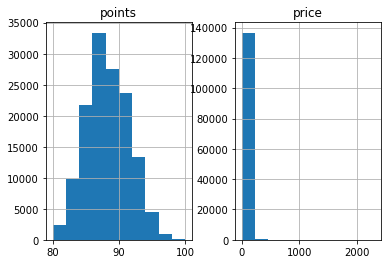

In [8]:
df_no_missing.hist()


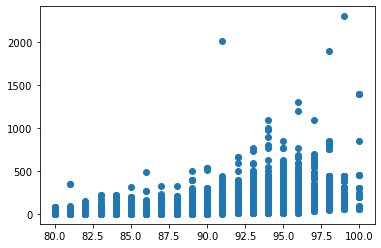

In [9]:
plt.scatter(df_no_missing['points'], df_no_missing['price'])

In [11]:
X = pd.DataFrame(df_no_missing['price'])
y = pd.DataFrame(df_no_missing['points'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[0.21892753874537796, 0.1918353396754383, 0.22075665724154825]
